# Preprocessing the Data for a Neural Network

In [17]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
import matplotlib as plot
lung_cancer_df = pd.read_csv("survey_lung_cancer_rawdata.csv")
lung_cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


In [18]:
lung_cancer_df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [19]:
lung_cancer_df.dtypes

GENDER                   object
AGE                       int64
SMOKING                  object
YELLOW_FINGERS           object
ANXIETY                  object
PEER_PRESSURE            object
CHRONIC DISEASE          object
FATIGUE                  object
ALLERGY                  object
WHEEZING                 object
ALCOHOL CONSUMING        object
COUGHING                 object
SHORTNESS OF BREATH      object
SWALLOWING DIFFICULTY    object
CHEST PAIN               object
LUNG_CANCER              object
dtype: object

In [20]:
# Determine the number of unique values in each column.
lung_cancer_df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [21]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
AGE_counts = lung_cancer_df.AGE.value_counts()
AGE_counts

64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: AGE, dtype: int64

<AxesSubplot:ylabel='Density'>

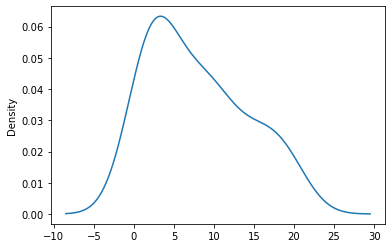

In [22]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
# Visualize the value counts
AGE_counts.plot.density()

In [23]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE

replace_application = list(AGE_counts[AGE_counts<10].index)

# Replace in dataframe
for app in replace_application:
    lung_cancer_df.AGE = lung_cancer_df.AGE.replace(app,"Other")
    
# Check to make sure binning was successful
lung_cancer_df.AGE.value_counts()

Other    102
64        20
63        19
56        19
62        18
60        17
61        16
59        15
70        15
58        13
67        13
69        11
55        11
72        10
71        10
Name: AGE, dtype: int64

In [24]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
lung_cancer_df.drop(columns=['AGE'], axis=1, inplace=True)
lung_cancer_df.head()

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


In [25]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
lung_cancer_cat = lung_cancer_df.dtypes[lung_cancer_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
lung_cancer_df[lung_cancer_cat].nunique()




GENDER                   2
SMOKING                  2
YELLOW_FINGERS           2
ANXIETY                  2
PEER_PRESSURE            2
CHRONIC DISEASE          2
FATIGUE                  2
ALLERGY                  2
WHEEZING                 2
ALCOHOL CONSUMING        2
COUGHING                 2
SHORTNESS OF BREATH      2
SWALLOWING DIFFICULTY    2
CHEST PAIN               2
LUNG_CANCER              2
dtype: int64

In [26]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(lung_cancer_df[lung_cancer_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(lung_cancer_cat)
encode_df.head()

,GENDER_F,GENDER_M,SMOKING_NO,SMOKING_YES,YELLOW_FINGERS_NO,YELLOW_FINGERS_YES,ANXIETY_NO,ANXIETY_YES,PEER_PRESSURE_NO,PEER_PRESSURE_YES,...,COUGHING_NO,COUGHING_YES,SHORTNESS OF BREATH_NO,SHORTNESS OF BREATH_YES,SWALLOWING DIFFICULTY_NO,SWALLOWING DIFFICULTY_YES,CHEST PAIN_NO,CHEST PAIN_YES,LUNG_CANCER_NO,LUNG_CANCER_YES
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [27]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
lung_cancer_df = lung_cancer_df.merge(encode_df,left_index=True, right_index=True)
lung_cancer_df = lung_cancer_df.drop(lung_cancer_cat,1)
lung_cancer_df.head()

/Users/nishatsultana/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,GENDER_F,GENDER_M,SMOKING_NO,SMOKING_YES,YELLOW_FINGERS_NO,YELLOW_FINGERS_YES,ANXIETY_NO,ANXIETY_YES,PEER_PRESSURE_NO,PEER_PRESSURE_YES,...,COUGHING_NO,COUGHING_YES,SHORTNESS OF BREATH_NO,SHORTNESS OF BREATH_YES,SWALLOWING DIFFICULTY_NO,SWALLOWING DIFFICULTY_YES,CHEST PAIN_NO,CHEST PAIN_YES,LUNG_CANCER_NO,LUNG_CANCER_YES
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [28]:
lung_cancer_df.tail()

,GENDER_F,GENDER_M,SMOKING_NO,SMOKING_YES,YELLOW_FINGERS_NO,YELLOW_FINGERS_YES,ANXIETY_NO,ANXIETY_YES,PEER_PRESSURE_NO,PEER_PRESSURE_YES,...,COUGHING_NO,COUGHING_YES,SHORTNESS OF BREATH_NO,SHORTNESS OF BREATH_YES,SWALLOWING DIFFICULTY_NO,SWALLOWING DIFFICULTY_YES,CHEST PAIN_NO,CHEST PAIN_YES,LUNG_CANCER_NO,LUNG_CANCER_YES
304,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
305,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
306,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
308,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [29]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = lung_cancer_df.LUNG_CANCER_YES
X = lung_cancer_df.drop(columns="LUNG_CANCER_YES")



# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                2400      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,861
Trainable params: 4,861
Non-trainable params: 0
_________________________________________________________________


2022-05-08 16:49:36.707079: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch', period=10)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])



Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 7.9159e-07 - accuracy: 1.0000
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 6.3234e-07 - accuracy: 1.0000
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 4.7127e-07 - accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 3.6483e-07 - accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 2.8894e-07 - accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 2.3814e-07 - accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 1.9910e-07 - accuracy: 1.0000
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 1.6976e-07 - accuracy: 1.0000
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 1.4946e-07 - accuracy: 1.0000
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 2.5487e-07 - accuracy: 1.0000
Epo

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 4.8708e-06 - accuracy: 1.0000 - 98ms/epoch - 33ms/step
Loss: 4.870756129093934e-06, Accuracy: 1.0


In [40]:
# Export our model to HDF5 file
nn.save("lung_cancer.h5")